<a href="https://colab.research.google.com/github/hina81/Prog2_11th/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

間違い探し

In [1]:
from google.colab import files
uploaded_file = files.upload()

Saving body.png to body.png


In [2]:
import numpy as np
import cv2, sys
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
file = "body.png"
src = cv2.imread( file )
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
if img is None:
  sys.exit(f'エラー: ファイルを開けませんでした {file}')

h = img.shape[0] # 画像imgの高さ(578)
w = img.shape[1] # 画像imgの幅(1200)
#print(h,w)

#画像の分割
img1 = img[0 : 578, 33: 598]   #598-33=565
cv2.imwrite("body1.png", img1)

img2 = img[0 : 578, 596 : 1161]
cv2.imwrite("body2.png", img2)

True

In [40]:
img_result = np.zeros((577,564,3), np.uint8)
img_result = img_result + 255

for i in range(577):
  for j in range(564):

    pos = (i, j)
    color1 = img1[pos]
    color2 = img2[pos]
    if np.all(color1 != color2):
      img_result[i, j] = color1

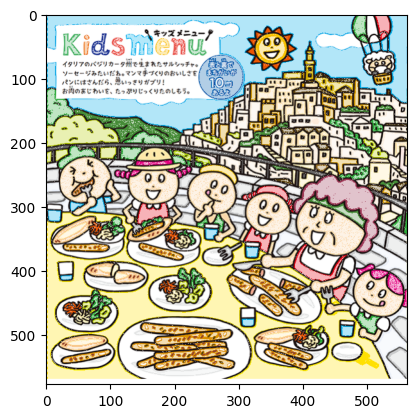

In [45]:
img1 = cv2.resize(img1, (img_result.shape[1], img_result.shape[0]))
img_kekka1 = cv2.addWeighted(src1=img_result, alpha=0.7, src2=img1, beta=0.3, gamma=0)
plt.imshow(img_kekka1)